In [0]:
%% capture
! pip uninstall tensorflow
! pip install tensorflow --upgrade

UsageError: Cell magic `%%` not found.


In [0]:
import tensorflow as tf
print(tf.__version__)

2.1.0


In [0]:
# Imports ----------------------------------------------------------------------
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tabulate import tabulate

In [0]:
# Functions --------------------------------------------------------------------

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [0]:
# Get Data ---------------------------------------------------------------------
fashion_data = keras.datasets.fashion_mnist
(train_i, train_l), (test_i, test_l) = fashion_data.load_data()
class_names = ['T-Shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


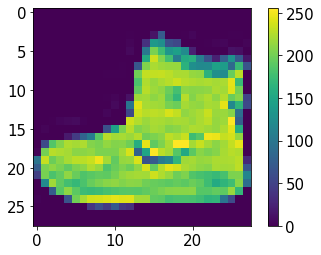

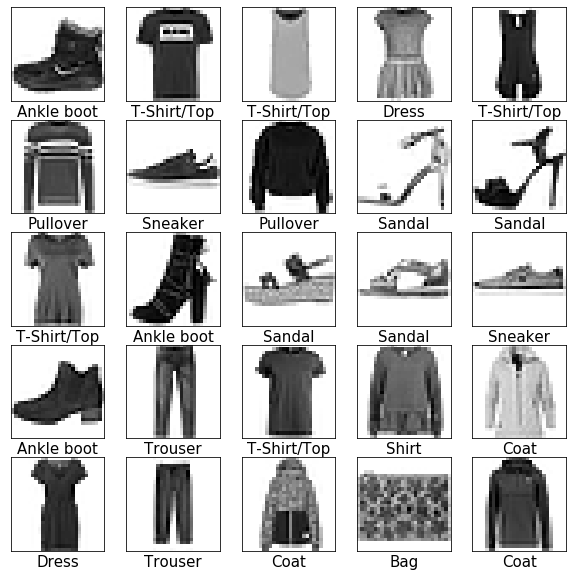

In [0]:
# Preprocess Data --------------------------------------------------------------

plt.figure()
plt.imshow(train_i[0])
plt.colorbar()
plt.grid(False)
plt.show()

# Normalize images.
train_i = train_i/255.0
test_i = test_i/255.0

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_i[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_l[i]])
plt.show()

In [0]:
# Create Model -----------------------------------------------------------------

# Build model.
model = keras.Sequential([
          keras.layers.Flatten(input_shape=(28, 28)), 
          keras.layers.Dense(128, activation="relu"), 
          keras.layers.Dense(10, activation="softmax")
          ])
model.compile(optimizer="adam", 
              loss="sparse_categorical_crossentropy", 
              metrics=["accuracy"])

# Train model.
h = model.fit(train_i, train_l, 
              epochs=10, 
              validation_data=(test_i, test_l))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 87us/sample - loss: 0.5014 - accuracy: 0.8242 - val_loss: 0.4356 - val_accuracy: 0.8428
Epoch 2/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.3765 - accuracy: 0.8642 - val_loss: 0.4006 - val_accuracy: 0.8585
Epoch 3/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.3395 - accuracy: 0.8767 - val_loss: 0.3714 - val_accuracy: 0.8665
Epoch 4/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.3143 - accuracy: 0.8840 - val_loss: 0.3527 - val_accuracy: 0.8709
Epoch 5/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.2968 - accuracy: 0.8907 - val_loss: 0.3516 - val_accuracy: 0.8747
Epoch 6/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.2795 - accuracy: 0.8965 - val_loss: 0.3747 - val_accuracy: 0.8718
Epoch 7/10
60000/60000 [==============================] 


Image Confidences:


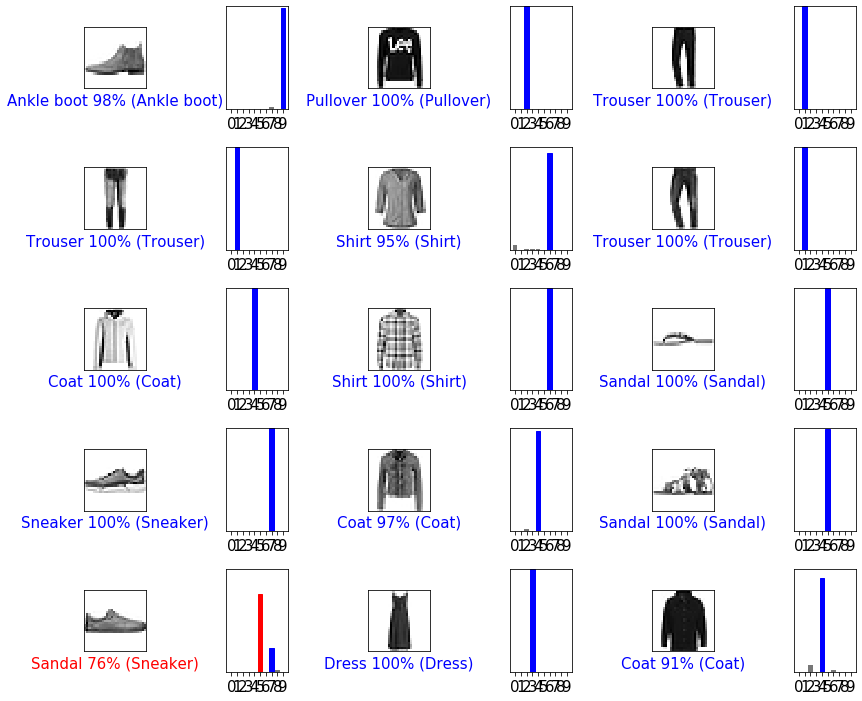


Single Prediction Confidence:
Actual Label:  Pullover


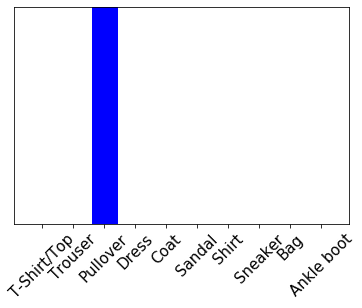

In [0]:
# View Predictions -------------------------------------------------------------

# Get predictions.
predictions = model.predict(test_i)

# View image confidences.
print("\nImage Confidences:")
num_rows = 5
num_cols = 3
num_i = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_i):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_l, test_i)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_l)
plt.tight_layout()
plt.show()

# Make single prediction.
print("\nSingle Prediction Confidence:")
img = test_i[1]
img = (np.expand_dims(img, 0))
predictions_s = model.predict(img)
plot_value_array(1, predictions_s[0], test_l)
_ = plt.xticks(range(10), class_names, rotation=45)
print("Actual Label: ", class_names[np.argmax(predictions_s[0])])

In [0]:
# Evaluate Model ---------------------------------------------------------------

# Get scores.
test_loss, test_acc = model.evaluate(test_i, test_l, verbose=2)
print("Test Accuracy:\t", test_acc)
print("Test Loss:\t", test_loss)

# Get confusion matrix.
print("\nConfusion Matrix:")
predictions_a = []
for row in predictions:
  predictions_a.append(np.argmax(row))
cf = confusion_matrix(predictions_a, test_l, labels=range(0,10))
tab = []
for i, row in enumerate(cf):
  r = [class_names[i]]
  r.extend(row)
  tab.append(r)
print(tabulate(tab, headers=class_names, tablefmt="psql"))

10000/10000 - 0s - loss: 0.3411 - accuracy: 0.8832
Test Accuracy:	 0.8832
Test Loss:	 0.3410874096274376

Confusion Matrix:
+-------------+---------------+-----------+------------+---------+--------+----------+---------+-----------+-------+--------------+
|             |   T-Shirt/Top |   Trouser |   Pullover |   Dress |   Coat |   Sandal |   Shirt |   Sneaker |   Bag |   Ankle boot |
|-------------+---------------+-----------+------------+---------+--------+----------+---------+-----------+-------+--------------|
| T-Shirt/Top |           793 |         1 |          7 |      13 |      0 |        0 |      98 |         0 |     4 |            0 |
| Trouser     |             1 |       972 |          0 |       7 |      1 |        0 |       1 |         0 |     0 |            0 |
| Pullover    |            26 |         0 |        796 |      10 |     77 |        0 |      87 |         0 |     5 |            0 |
| Dress       |            39 |        20 |         10 |     905 |     24 |        1

The confusion matrix indicates that t-shirts/tops, pullovers, coats, and shirts all tend to get confused with each other. This would make sense, as all of these articles of clothing have similar shapes. Sneakers and ankle boots get confused a bit - and again, they are similary shaped. The items that rarely get confused with anything else - trousers and bags - are shaped nothing like the rest of the other classes. 

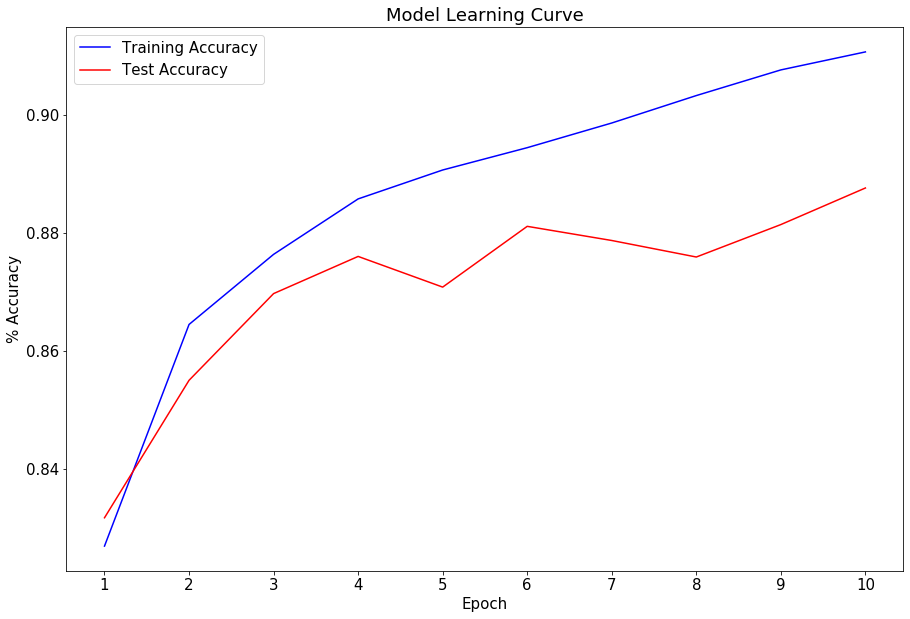

In [0]:
# Graph Learning Curve by Time -------------------------------------------------
y_train = hist.history['accuracy']
y_test = hist.history['val_accuracy']
plt.figure(figsize=(15, 10))
plt.rcParams.update({'font.size': 15})
l1 = plt.plot(range(1, 11), y_train, color='b', label="Training Accuracy")
l2 = plt.plot(range(1, 11), y_test, color='r', label="Test Accuracy")
plt.xticks(range(1, 11), range(1, 11))
plt.xlabel("Epoch")
plt.ylabel("% Accuracy")
plt.title("Model Learning Curve")
plt.legend()
plt.show()

In [0]:
# Graph Learning Curve by Data Avalibility -------------------------------------
from sklearn.utils import resample
# Resample data.
h_train = []
h_test = []
idxs = range(0, 60000)
for n in range(12):
  keys = resample(idxs, random_state=1, n_samples=(5000+(n*5000)))
  x_train = []
  y_train = []
  for k in keys:
      x_train.append(train_i[k])
      y_train.append(train_l[k])
  x_train = np.array(x_train)
  y_train = np.array(y_train)

  # Build model.
  model = keras.Sequential([
            keras.layers.Flatten(input_shape=(28, 28)), 
            keras.layers.Dense(128, activation="relu"), 
            keras.layers.Dense(10, activation="softmax")
            ])
  model.compile(optimizer="adam", 
                loss="sparse_categorical_crossentropy", 
                metrics=["accuracy"])

  # Train model.
  h = model.fit(x_train, y_train, epochs=6)
  
  # Get scores.
  test_loss, test_acc = model.evaluate(test_i, test_l, verbose=2)
  h_train.append(h.history["accuracy"][-1])
  h_test.append(test_acc)

Train on 5000 samples
Epoch 1/6
5000/5000 [==============================] - 1s 120us/sample - loss: 0.8074 - accuracy: 0.7244
Epoch 2/6
5000/5000 [==============================] - 0s 73us/sample - loss: 0.5449 - accuracy: 0.8114
Epoch 3/6
5000/5000 [==============================] - 0s 79us/sample - loss: 0.4773 - accuracy: 0.8320
Epoch 4/6
5000/5000 [==============================] - 0s 76us/sample - loss: 0.4272 - accuracy: 0.8536
Epoch 5/6
5000/5000 [==============================] - 0s 76us/sample - loss: 0.4039 - accuracy: 0.8582
Epoch 6/6
5000/5000 [==============================] - 0s 75us/sample - loss: 0.3857 - accuracy: 0.8646
10000/10000 - 0s - loss: 0.4991 - accuracy: 0.8316
Train on 10000 samples
Epoch 1/6
10000/10000 [==============================] - 1s 98us/sample - loss: 0.7239 - accuracy: 0.7518
Epoch 2/6
10000/10000 [==============================] - 1s 75us/sample - loss: 0.4857 - accuracy: 0.8318
Epoch 3/6
10000/10000 [==============================] - 1s 78us/sa

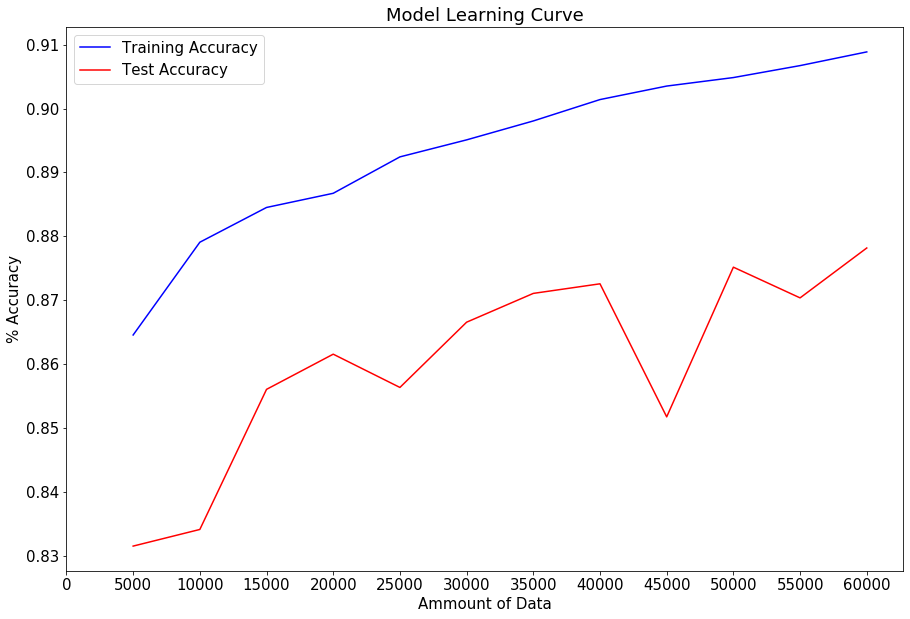

In [0]:
plt.figure(figsize=(15, 10))
plt.rcParams.update({'font.size': 15})
l1 = plt.plot(range(1, len(h_train)+1), h_train, color='b', label="Training Accuracy")
l2 = plt.plot(range(1, len(h_test)+1), h_test, color='r', label="Test Accuracy")
plt.xticks(range(13), [x*5000 for x in range(13)])
plt.xlabel("Ammount of Data")
plt.ylabel("% Accuracy")
plt.title("Model Learning Curve")
plt.legend()
plt.show()